In [1]:
# importing mecessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
# reading file

path='tv_shows.csv'
df = pd.read_csv(path)                
df.head()


,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1


In [3]:
print(df.dtypes)

Unnamed: 0           int64
Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
type                 int64
dtype: object


In [4]:
# dropping columns

df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('type', axis=1, inplace=True)

In [5]:
# replacing nan values

df.replace(np.nan, 0, inplace=True)
df.replace('all', 'All', inplace=True)

In [6]:
df['Age'].value_counts()

# replacing values

df['Age'].replace(0,'All', inplace=True)

In [7]:
df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0
1,Stranger Things,2016,16+,8.8,93%,1,0,0,0
2,Money Heist,2017,18+,8.4,91%,1,0,0,0
3,Sherlock,2010,16+,9.1,78%,1,0,0,0
4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0


In [8]:
df.tail(10)

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
5601,Disney Junior Music Nursery Rhymes,2017,All,6.6,0,0,0,0,1
5602,Bug Juice: My Adventures at Camp,2018,All,7.2,0,0,0,0,1
5603,Disney Insider,2012,All,0.0,0,0,0,0,1
5604,Lost Treasures of the Maya,2019,All,0.0,0,0,0,0,1
5605,Awesome Animals,2013,All,0.0,0,0,0,0,1
5606,Tut's Treasures: Hidden Secrets,2018,All,0.0,0,0,0,0,1
5607,Paradise Islands,2017,All,0.0,0,0,0,0,1
5608,Wild Russia,2018,All,0.0,0,0,0,0,1
5609,Love & Vets,2017,All,0.0,0,0,0,0,1
5610,United States of Animals,2016,All,0.0,0,0,0,0,1


In [9]:
df['Age'].value_counts()

All    2991
16+    1018
7+      848
18+     750
13+       4
Name: Age, dtype: int64

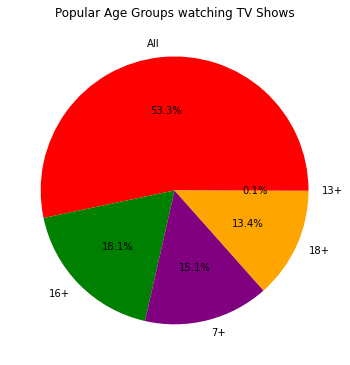

In [10]:
#Popular Age Rating

popular_age = df['Age'].value_counts()
popular_age = popular_age.reset_index()

popular_age = popular_age.rename(columns={'Age':'Count'})
popular_age = popular_age.rename(columns={'index':'Age'})

plt.figure(figsize = (6,10))   # fig size

colors = ["red", "green", "purple", "orange"]    # applying colors

plt.pie(popular_age['Count'], labels = popular_age['Age'], colors=colors, autopct='%1.1f%%')
plt.title("Popular Age Groups watching TV Shows")

plt.show()


In [11]:
df.corr()   # finding corelation

,Year,IMDb,Netflix,Hulu,Prime Video,Disney+
Year,1.000000,-0.090234,0.207759,-0.092723,-0.171060,-0.018914
IMDb,-0.090234,1.000000,0.255488,0.102850,-0.325745,0.051235
Netflix,0.207759,0.255488,1.000000,-0.392190,-0.500160,-0.119102
Hulu,-0.092723,0.102850,-0.392190,1.000000,-0.375221,-0.081313
Prime Video,-0.171060,-0.325745,-0.500160,-0.375221,1.000000,-0.143163
Disney+,-0.018914,0.051235,-0.119102,-0.081313,-0.143163,1.000000


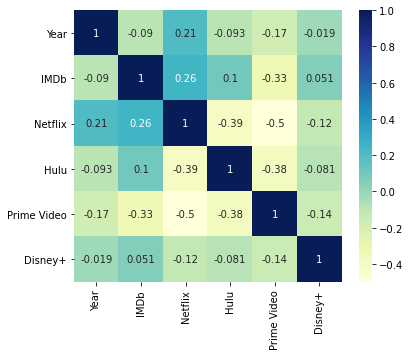

In [12]:
# HeatMap

HeatMap = df.corr()
HeatMap_Fig = plt.figure(figsize = (6,5))
sns.heatmap(HeatMap, annot= True, cmap="YlGnBu")
plt.show()

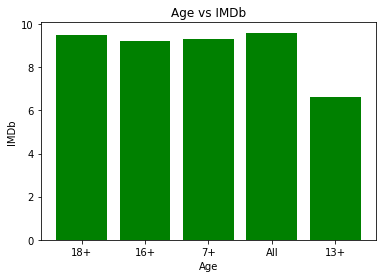

<Figure size 2160x1440 with 0 Axes>

In [13]:
# Bar Chart for Age Groups who see IMDb ratings before watching movie

x = df['Age']
y = df['IMDb']

plt.bar(x,y,color=['green'])

plt.title('Age vs IMDb')
plt.xlabel('Age')
plt.ylabel('IMDb')

plt.figure(figsize=(30,20))
plt.show()

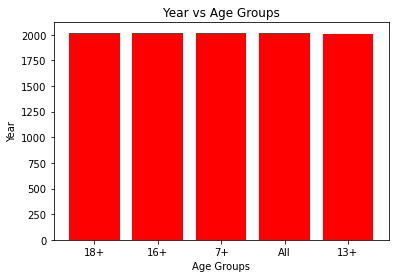

<Figure size 2160x1440 with 0 Axes>

In [18]:
#year vs age group

x = df['Age']
y = df['Year']
plt.bar(x,y)
plt.bar(x,y,color=['red'])
plt.title('Year vs Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Year')
plt.figure(figsize=(30,20))
plt.show()